<a href="https://colab.research.google.com/github/loversky01/SAHI-clone/blob/master/CloneSAHI_Yolov9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/improved_yolo_SAHI_clone.zip

Archive:  /content/improved_yolo_SAHI_clone.zip
   creating: improved_yolo_SAHI_clone/
   creating: improved_yolo_SAHI_clone/components/
  inflating: improved_yolo_SAHI_clone/components/CropComponent.py  
 extracting: improved_yolo_SAHI_clone/components/__init__.py  
  inflating: improved_yolo_SAHI_clone/functions_extra.py  
   creating: improved_yolo_SAHI_clone/nodes/
  inflating: improved_yolo_SAHI_clone/nodes/CombineDetections.py  
  inflating: improved_yolo_SAHI_clone/nodes/MakeCropsDetectThem.py  
 extracting: improved_yolo_SAHI_clone/nodes/__init__.py  
  inflating: improved_yolo_SAHI_clone/__init__.py  


In [2]:
!pip install -r /content/requirements.txt

In [10]:
import sys
sys.path.append('/content/improved_yolo_SAHI_clone')

In [14]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

from improved_yolo_SAHI_clone import (
    visualize_results_usual_yolo_inference,
    get_crops,
)

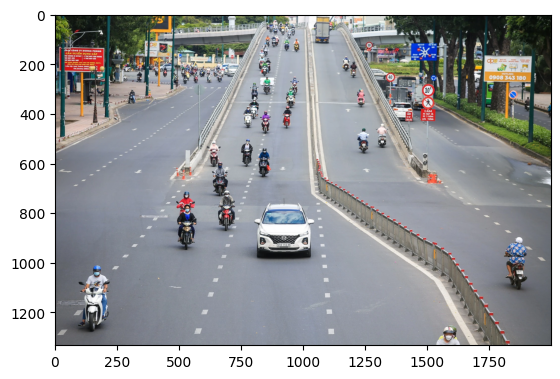

In [55]:
# Load the image
img_path = '/content/5a-16754443484221511456134.webp'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB));

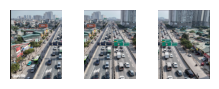

Number of generated images: 3


In [52]:
img_path = '/content/Screenshot 2024-05-13 152215.png'
image = cv2.imread(img_path)

data_all_crops = get_crops(
    image,
    shape_x=600,
    shape_y=800,
    overlap_x=50,
    overlap_y=10,
    show=True,
    save_crops=True,
    start_name="img",
    resize=True,
)

In [47]:
np.array(data_all_crops).shape


(2, 800, 600, 3)

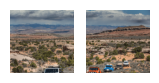

Number of generated images: 2


In [48]:
data_all_crops = get_crops(image, shape_x=500, shape_y=500, overlap_x=0, overlap_y=0, show=True)


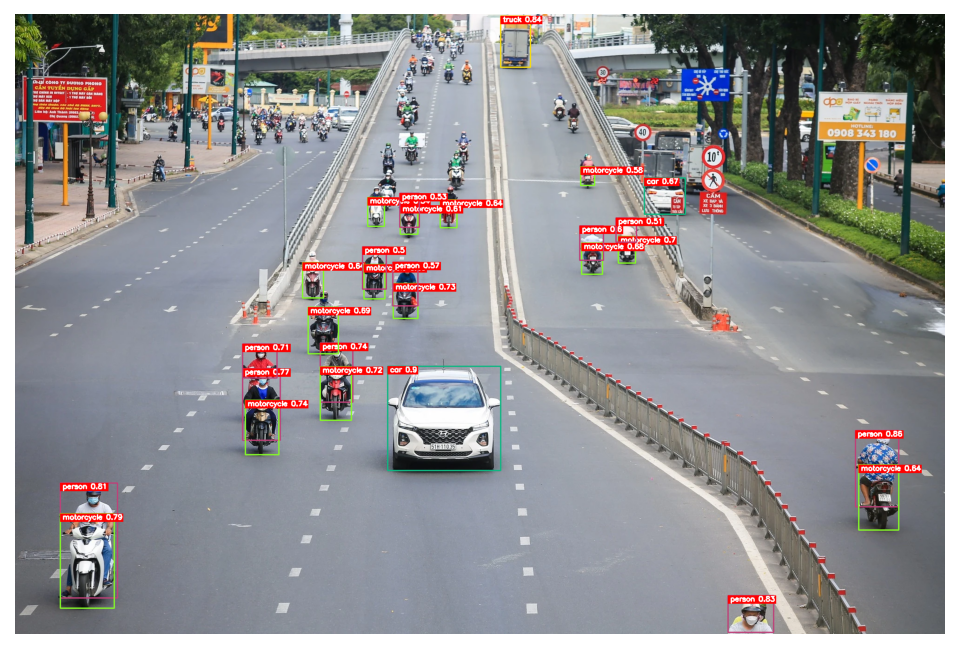

In [56]:
# Define the parameters
imgsz = 640
conf = 0.5
iou = 0.7

# Load the YOLOv9 model
model = YOLO("yolov9e.pt")  # Make sure the model file is in the correct path

visualize_results_usual_yolo_inference(
    img,
    model,
    imgsz,
    conf,
    iou,
    segment=False,
    delta_colors=3,
    thickness=2,
    font_scale=0.5,
    show_boxes=True,
    fill_mask=False,
    alpha=0.3,
    random_object_colors=False,
    show_confidences=True,
)